### Step-1: Preliminary setup

In [1]:
#Import gensim library
import gensim
from gensim.models import Word2Vec
from nltk.corpus import PlaintextCorpusReader
import nltk
import pandas as pd
import numpy as np

### Step-2: Load Dataset and Train Word2Vec model

In [2]:
#Load reviews files from the following cities : Chicago, San Francisco, New York City
tokensents_lst=[]
cities = ["chicago", "san-francisco","new-york-city"]
for city in cities:
    print("Loaded City:",city)
    corpus_root = 'OpinRankDataset/hotels/'+city #Root directory
    #Reading all the Corpus in the root directory
    filelists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1') 
    tokensents = filelists.sents() # sentence-splitted and word-tokenized list of sentences
    tokensents_lst += list(tokensents) #Concatente all the sentence tokens into one list
#Train the Word2Vec Model
model = Word2Vec(tokensents_lst)    

Loaded City: chicago
Loaded City: san-francisco
Loaded City: new-york-city


In [7]:
tokensents

[['Feb', '27', '2009', 'The', 'history', 'the', 'class', 'the', 'location', '...', 'this', 'hotel', 'was', 'an', 'amazing', 'part', 'of', 'my', 'vacation', 'The', 'hotel', "'", 's', 'really', 'part', 'of', 'the', 'Republican', 'National', 'Women', "'", 's', 'Club', ',', 'which', 'made', 'me', 'apprehensive', 'at', 'first', ',', 'but', 'it', 'was', 'definitely', 'worth', 'it', '.'], ['The', 'building', 'filled', 'with', 'young', 'débutantes', 'and', 'their', 'mothers', 'the', 'last', 'day', 'we', 'were', 'there', ',', 'which', 'might', 'have', 'been', 'the', 'only', 'bad', 'thing', 'that', 'happened', '.'], ...]

### Step-3: Obtaining Feature Words

In [3]:
#Embeding for "service" word
#print(model.wv['Rooms'])

In [3]:
#Similar word vector as the word "service".
#HW5: 'room' (top 50), 'rooms' (top 50), 'Room' (top 20) and 'Rooms' (top 20)

#Initialize the list of feature
feature_lst= []
for word in ["room","rooms", "Room", "Rooms"]:
    if word[0]=="r": #Find top 50 
        word_lst = list(model.most_similar(word, topn=50))
        for i in range(len(word_lst)):
            #print(word_lst[i][0])
            feature_lst.append(word_lst[i][0])
    else:
        word_lst = list(model.most_similar(word, topn=20))
        for i in range(len(word_lst)):
            #print(word_lst[i][0])
            feature_lst.append(word_lst[i][0])
print(set(feature_lst))            
feature_lst = list(set(feature_lst))            

{'rug', 'mirror', 'rm', 'Towels', 'showers', 'king', 'Amenities', 'armoire', 'Bathroom', 'maid', 'headboard', 'tub', 'balcony', 'Bedroom', 'towers', 'suites', 'suitcase', 'carpets', 'bathrooms', 'restrooms', 'dresser', 'heater', 'television', 'bedroom', 'TVs', 'ones', 'incidents', 'plug', 'robe', 'Rooms', 'furnishings', 'bathroom', 'nightstand', 'couch', 'washrooms', 'Fairly', 'bathtubs', 'Ours', 'washroom', 'unit', 'tray', 'cockroach', 'Showers', 'suite', 'accomodations', 'device', 'closet', 'Mine', 'Elevators', 'wire', 'bedrooms', 'televisions', 'crib', 'Pillows', 'cot', 'refrigerator', 'closets', 'Bedrooms', 'rooms', 'units', 'hotelrooms', 'hotels', 'Full', 'elevators', 'sinks', 'terraces', 'sofabed', 'tvs', 'bathtub', 'refridgerator', 'disappointingly', 'amenties', 'toilets', 'Accomodations', 'beds', 'kings', 'guestrooms', 'table', 'bed', 'cabinet', 'Pool', 'oddly', 'apartments', 'capacious', 'lifts', 'fixtures', 'portions', 'wardrobe', 'balconies', 'Hallways', 'roomwas', 'guestroo

/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  del sys.path[0]


### Step-4: hand-write some patterns

[('the', 'DT'), ('rooms', 'NNS'), ('are', 'VBP'), ('comfortable', 'JJ')]
clause1a
[('the', 'DT'), ('rooms', 'NNS'), ('are', 'VBP'), ('comfortable', 'JJ')]


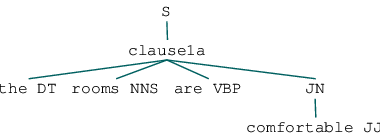

In [24]:
############# Grammar: NP
#sent = "Nicely painted rooms"
#sent = "clean room"
#sent = "very large painted bathroom window"
#sent = "very large painted bathroom"
#sent= "modern shower head"

############ clause1a
sent = "room was spotless"
sent = "the Beds were very comfortable"
sent = "The walls are thin"
sent = "The rooms seemed pretty clean"
sent = "the beds were excellent"
sent = "the bed is very nice"
sent = "the bottles are not too large"
sent = "the bottles are too large"
sent ="the bed are not good"
sent ="the bed are not very good enough"
sent ="the bed are not very good"

############ clause1b
sent = " room was spotless and clean"
sent = " room was spotless and bed is soft"
sent = " the room is pretty beautiful and the bed is pretty soft"
sent = " the room is  beautiful and the bed is very soft"

############ clause2
sent = " John loves the room"
sent = " She likes this beautiful room"
sent = "I love the room"

############ clause2b
#sent = "She likes this beautiful room and soft bed"
#sent = "She likes this room and the bed"


############clause3
#sent = "the bottles are way too large"

############clause4
#sent="the sheet did not smell good"

############clause5
sent = "I love room with many windows"

############Extra
sent = "I love a car which is red made in europe"
sent=  " the rooms are comfortable"


print(nltk.pos_tag(nltk.word_tokenize(sent)))
sent =  nltk.word_tokenize(sent)

cp = nltk.RegexpParser(grammar)
review_lst=[]
tree = cp.parse(nltk.pos_tag(sent))
for subtree in tree.subtrees():
    if subtree.label() =="NP":
        print("NP")
        print(subtree.leaves())    
    if subtree.label() =="clause1a":
        print("clause1a")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause1b":
        print("clause1b")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause2a":
        print("clause2a")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause2b":
        print("clause2b")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause3":
        print("clause3")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause4":
        print("clause4")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())
    if subtree.label() =="clause5":
        print("clause5")
        print(subtree.leaves())
        review_lst.append(subtree.leaves())


tree

In [4]:
#regex grammar
grammar = r"""
JN:{<RB.*|JJ.*>}

NP:{<DT|PRP\$>?<RB>*<JN|VB.*>+<NN.*>+} 

clause1a:{<DT|PRP>?<NN.*>+<VB.*>+<JN>+<JJ.*>*}
        
clause1b:{<clause1a>+<,|CC>+<JN|NN.*>+<JN|NN.*>*}      
        {<clause1a>+<,|CC>+<clause1a>+}

clause2a:{<NN.*|PRP.*>+<IN|VB.*>+<DT>*<NP|NN.*>+}

clause2b:{<clause2a>+<,|CC>+<DT>*<JN|NN.*|NP>+}      
        {<clause2a>+<,|CC>+<clause2a>+}
        
clause3: {<DT>?<NN.*>+<NP>+<JN>*}

clause4: {<clause1a>+<VB.*>+<JN>*}

clause5: {<NN.*|PRP.*><NP>+<IN>+<NP>*}


"""

In [ ]:

{<DT|PRP/$>?<NN.*>+<VB.*>+<JN>}

### Step-5: Extract and Parse all reviews in the city "Chicago"

In [17]:
#NLTK Regex parser
cp = nltk.RegexpParser(grammar)


######################### Load Chicago Review as test set
test_root = 'OpinRankDataset/hotels/chicago/'
testfile= test_root  + "usa_illinois_chicago_hard_rock_hotel_chicago"
f= open(testfile, "r",encoding='latin-1')
text = f.read()
sentences = nltk.sent_tokenize(text)
sentlist=[nltk.word_tokenize(sent) for sent in sentences]
#########################

#Extract reviews segments which matching the patterns in Step-4
#by using Regex pattern parser
review_lst=[]
for sent in sentlist:
    tree = cp.parse(nltk.pos_tag(sent))
    for subtree in tree.subtrees():
        if subtree.label() =="NP":
            #print("NP")
            #print(subtree.leaves())    
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause1a":
            #print("clause1a")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause1b":
            #print("clause1b")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause2a":
            #print("clause2a")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause2b":
            #print("clause2b")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause3":
            #print("clause3")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause4":
            #print("clause4")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        if subtree.label() =="clause5":
            #print("clause5")
            #print(subtree.leaves())
            review_lst.append(subtree.leaves())
        
        
#Filtering out all the segments which do not have feature words              
review_lst2=[]
for line in review_lst:
    for item in line:
        if item[0] in feature_lst:
            review_lst2.append(line)
            continue


### Step-6: Polarity Score

##### Given Functions

In [18]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

def to_wntag(pos):
    """
    Given a Penn tag, returns the corresponding Wordnet pos tag.
    Note that WordNet only contain nouns/verbs/adjectives/adverbs.
    """
    ch = pos[0]
    if ch == 'N':
        return wn.NOUN #noun
    elif ch == 'V':
        return wn.VERB # verb
    elif ch == 'J':
        return wn.ADJ # adjective
    elif ch == 'R':
        return wn.ADV # adverb
    else:
        return None

def wn_lemmatize(token, wntag):
    """
    Applies WordNet morpher (which requires a pos) and 
    returns the morphological lemma form, or None.
    """
    return wn.morphy(token, wntag)

In [ ]:
#review_lst2= [[('The', 'DT'), ('roOm', 'NNS'), ('is', 'VBP'), ('Not', 'RB'), ('HUGE', 'JJ')],
 #           [('the', 'DT'), ('rooms', 'NNS'), ('are', 'VBP'), ('very', 'RB'), ('Small', 'JJ')],
  #         [('weird', 'JJ'), ('Windows', 'NNS')],
   #       [('The', 'DT'), ('Beds', 'NNS'), ('were', 'VBD'), ('Very', 'RB'), ('good', 'JJ')],
    #     [('the', 'DT'), ('Elevators', 'NNS'), ('are', 'VBZ'), ('Pretty', 'JJ')],
     #   [('the', 'DT'), ('Elevator', 'NNS'), ('is', 'VBZ'), ('Pretty', 'JJ')],
      #       [("Awesome", 'NNP'),('Rooms', 'NNS'),('Comfy', 'VBP')]]
#review_lst2 = [[('amenities', 'NNS'), ('were', 'VBD'), ('excellent', 'JJ'), ]]

In [40]:
w="comfortable"
tag="JJ"
wntag = to_wntag(tag)
lemma = wn_lemmatize(w, wntag)
synsets = wn.synsets(lemma, pos=wntag)
print(synsets)
synset = synsets[2]


swn_synset = swn.senti_synset(synset.name()) #SentiWordNet synset
print(swn_synset)
pscore = swn_synset.pos_score() - swn_synset.neg_score() #polarity score for the word
pscore

[Synset('comfortable.a.01'), Synset('comfortable.a.02'), Synset('comfortable.s.03'), Synset('comfortable.s.04'), Synset('comfortable.s.05')]
<comfortable.s.03: PosScore=0.25 NegScore=0.0>


0.25

In [19]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
negcontractions = ["n't", "'t"]
negwords = ['not', 'no', "nor"]
df_lst = [0 for item in range(len(review_lst2))]
df_lst2 = []
df_lst1 = []

cnt=0
for tups in review_lst2:
    lst=[]
    tot_pscore=0
    word_cnt=0
    for i in range(len(tups)):
        tups[i]=list(tups[i]) #Convert the list back to tuples
        w=tups[i][0].lower() #Lower the case of words and assign the word from the first element of each tuple
        tag=tups[i][1] #Assign the tag from the 2nd element of tuples
        
        #If the word is a negative contraction suffix ('negcontractions'), 
        #change it to the word: "not"
        if w in negcontractions:
            w="not"

        # a word is a tuple (w, tag) such as ('bathrooms', 'NNS')
        wntag = to_wntag(tag) # in WordNet, either noun/verb/adj/adv
        if wntag is not None and (w not in stopwords or w in negwords): 
            #print(w)
            tups[i][0] = w 
            word_cnt+=1
            lemma = wn_lemmatize(w, wntag) #lemmatize token

            if lemma is None:
                tups[i]=tuple(tups[i])
                continue

            synsets = wn.synsets(lemma, pos=wntag) #all synsets of the word

            if not synsets:
                tups[i]=tuple(tups[i])
                continue

            # take the first sense
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name()) #SentiWordNet synset
            pscore = swn_synset.pos_score() - swn_synset.neg_score() #polarity score for the word
            tot_pscore+=pscore
            
            #Convert the list back to tuples
            tups[i]=tuple(tups[i])

        else:
            tups[i][0] = w 
            tups[i]=tuple(tups[i])
            
    df_lst1.append(tot_pscore/word_cnt)
    df_lst2.append(tups)
    cnt+=1
    
    
#Concatnate the tuples and Polarity Score in a DataFrame
#df = pd.DataFrame({ i:pd.Series(value) for i, value in enumerate(df_lst) })
df1= pd.DataFrame(df_lst1, columns= ["Polarity_Score"] )
df2= pd.DataFrame(df_lst2)
df = pd.concat((df1,df2), axis=1)
df = df.sort_values(by=["Polarity_Score",0,1,2,3,4,5,6,7,8,9,10], 
                    ascending=[False, True, True,True, True,True,True, True,True, True,True,True])

In [20]:
len(review_lst2)

1196

In [21]:
pre_lst=[]
new_lst=[]
cnt=0
with open("XXXX-rooms.txt", "w") as f:
    for row in range(0,df.shape[0]):
        new_lst = list(df.iloc[row])
        new_lst = [item  for item in new_lst if item is not None]
        #print(new_lst)

        if pre_lst == new_lst:
            continue
            
        for item in df.iloc[row]:
            if item is not None:
                try:
                    if type(float(item)) == float:
                        #print(item, end=", [")
                        f.write("{0}, [".format(item))
                        continue
                except:
                    pass
                #print(item, end=",")
                f.write("{0}, ".format(item))

            else:
                #print("]",end="\n")
                f.write("]\n")
                cnt+=1
                break
        pre_lst = new_lst
f.close()
print(cnt)    

1054


########################END

In [12]:
#sent = nltk.pos_tag(nltk.word_tokenize("She girl let down her long hair"))
sent = nltk.pos_tag(nltk.word_tokenize("quick"))
print(sent)

#regex grammar
grammar = r"""
NP:{<DT|PRP\$>?<JJ>*<NN>} 
FOO:{<NP><VB.><JJ>}"""
#"NP:{DT|PRP\$>?<JJ>*<NN>}" #, FOO: {<NP><VB.><JJ>}"

#NLTK Regex parser
cp = nltk.RegexpParser(grammar)
tree = cp.parse(sent)
print(tree)
for subtree in tree.subtrees():
    print(subtree)



[('quick', 'NN')]
(S (NP quick/NN))
(S (NP quick/NN))
(NP quick/NN)


In [13]:
#NLTK Regex parser
cp = nltk.RegexpParser(grammar)
tree = cp.parse(sent)
print(tree)
for subtree in tree.subtrees():
    print(subtree)


(S (NP quick/NN))
(S (NP quick/NN))
(NP quick/NN)


In [14]:
for subtree in tree.subtrees():
    if subtree.label() =="NP":
        print(subtree.leaves())

[('quick', 'NN')]


In [15]:
for sent in sentlist:
    cp.parse(nltk.pos_tag(sent))
    for subtree in tree.subtrees():
        if subtree.label() =="NP":
            print(subtree.leaves())

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',

[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick', 'NN')]
[('quick',